## Observations and Insights 

This study has a population of 249 mice with SCC tumor growth were treated through a variety of drug regimens.

Over the course of 45 days, tumor development was observed and measured, and had a total of 1888 observation.

In the summary statistics table the values with the best results of tumor volumen were Capomulin and Ramicame treatments.

The code generate a line plot of the tumor volume vs time point of a mouse treated with Capomulin and for almost all mice the tendency is to decrease which indicates a good behavior of the treatment.

Using the data between mouse weight versus average tumor volume for the Capomulin treatment, we can observed that the correlation coefficient is 0.84, which leads to the conclusion that the therapeutic effect is not related to the weight of the mouse because the value is above 0.05.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_mergedata=pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID')
# Display the data table for preview
mouse_mergedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
tot_num_mice = len(mouse_mergedata["Mouse ID"].unique())
print("The mouse date have:", tot_num_mice, "mice")

The mouse date have: 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint= mouse_mergedata.groupby(['Mouse ID', 'Timepoint'])
mouse_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli_mouse=mouse_mergedata.duplicated(subset=['Mouse ID','Timepoint'],keep='first')
duplicate_data = mouse_mergedata.loc[dupli_mouse == True]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dupli_data = mouse_mergedata.drop_duplicates(['Mouse ID','Timepoint'])
drop_dupli_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(drop_dupli_data)
num_mice

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean=drop_dupli_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median=drop_dupli_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_var=drop_dupli_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_std=drop_dupli_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem=drop_dupli_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
#create a Data frame with the values
regimen_summary_df = pd.DataFrame({"Mean": regimen_mean.map("{:.2f}".format),
                                   "Median": regimen_median.map("{:.2f}".format),
                                   "Variance": regimen_var.map("{:.2f}".format),
                                   "Standard desviation": regimen_std.map("{:.2f}".format),
                                   "SEM": regimen_sem.map("{:.2f}".format)
                              })
regimen_summary_df

,Mean,Median,Variance,Standard desviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_aggregation_summary=mouse_mergedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
regimen_aggregation_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

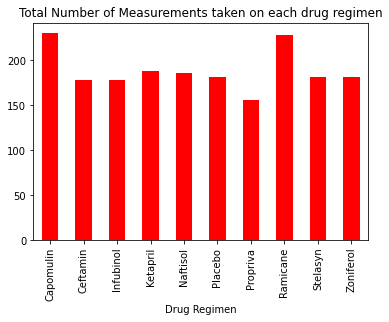

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measurements= drop_dupli_data.groupby('Drug Regimen')["Mouse ID"].count()
chart_measurements=num_measurements.plot(kind="bar", facecolor="red", title="Total Number of Measurements taken on each drug regimen")

<function matplotlib.pyplot.show(*args, **kw)>

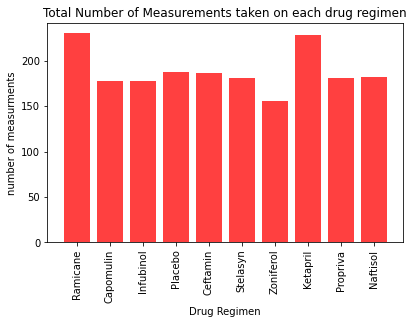

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drop_dupli_data["Drug Regimen"].unique(),num_measurements, color='r', alpha=0.75, align="center" )
plt.title("Total Number of Measurements taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("number of measurments")
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show

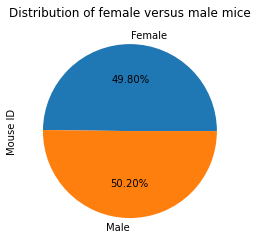

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_unique_data = mouse_mergedata.drop_duplicates(['Mouse ID'])
mouse_sex= mouse_unique_data.groupby('Sex')["Mouse ID"].count()
mouse_sex.plot(kind="pie", autopct='%.2f%%',title='Distribution of female versus male mice')

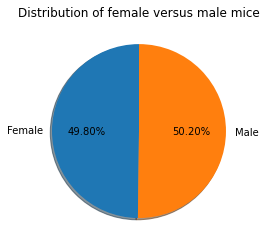

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution of female versus male mice")
plt.pie(mouse_sex, labels=["Female","Male"],autopct="%.2f%%", shadow=True, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint_final = drop_dupli_data.drop_duplicates(['Mouse ID'],keep='last')
timepoint_final = timepoint_final.sort_values("Mouse ID", ascending=True)
timepoint_final

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_tumor_list=[]
drug_tumor_list=[]
for dr in drug_regimen:  
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    vol_tumor_list = timepoint_final.loc[timepoint_final["Drug Regimen"] == dr]['Tumor Volume (mm3)']
    drug_tumor_list.append(vol_tumor_list)
    # Determine outliers using upper and lower bounds
    quartiles = vol_tumor_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = vol_tumor_list.loc[(vol_tumor_list < lower_bound) | (vol_tumor_list > upper_bound)]
    print(dr)
    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3)s is: {iqr}")
    print(f"The the median of Tumor Volume (mm3)s is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-------------------------------------------------------")
          

Capomulin
The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3)s is: 7.781863460000004
The the median of Tumor Volume (mm3)s is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------
Ramicane
The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3)s is: 9.098536719999998
The the median of Tumor Volume (mm3)s is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------
Infubinol
The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3)s is: 11.477135160000003
The 

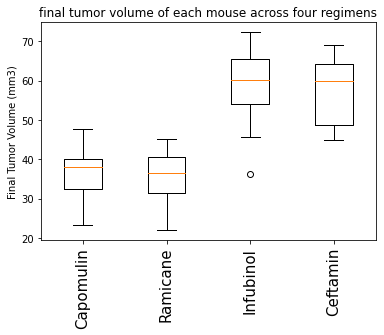

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume of each mouse across four regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_tumor_list)
plt.xticks([1, 2, 3, 4],drug_regimen,fontsize=15,rotation='vertical')
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = drop_dupli_data.loc[drop_dupli_data["Drug Regimen"] == 'Capomulin']
print(capomulin_data['Mouse ID'].unique())
print(len(capomulin_data['Mouse ID'].unique()),"mice")
mouse=input("Mouse ID treated with Capomulin:")    

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
25 mice
Mouse ID treated with Capomulin:s710


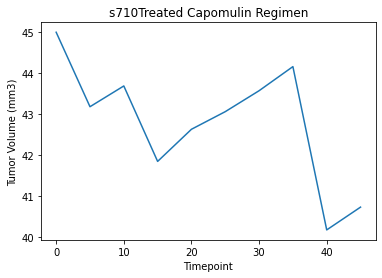

In [22]:
capomulin_mouse_data=capomulin_data.loc[capomulin_data['Mouse ID'] == mouse]
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(mouse + "Treated Capomulin Regimen")
plt.show()

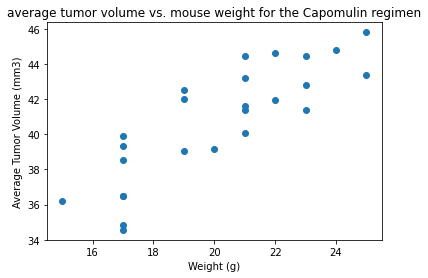

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
averages = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(averages['Weight (g)'],averages['Tumor Volume (mm3)'])[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


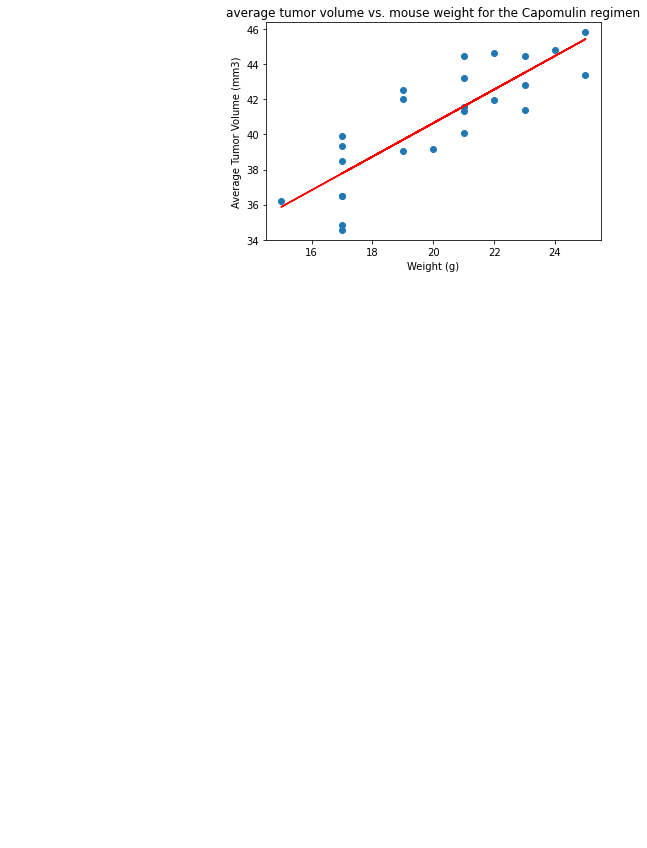

In [20]:
# Add the linear regression equation and line to plot
x_values = averages['Weight (g)']
y_values = averages['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()